<a href="https://colab.research.google.com/github/aaronjw-arch/gdp-dashboard/blob/main/ACDT%20G27%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/MYSlevel_GDPpcgrowth_AsiaNoResource.csv")

# Drop missing values (for clean visualization)
df = df.dropna(subset=["MYS", "GDP_growth"])

# Basic overview
print(df.head())
print(df.describe())


  ISO3     Country           GDP_Country  Year       MYS  GDP_growth
2  BGD  Bangladesh            Bangladesh  1990  3.294752    3.086982
4  CHN       China                 China  1990  4.143790    2.406559
5  FJI        Fiji                  Fiji  1990  6.602397    5.223064
8  HKG   Hong Kong  Hong Kong SAR, China  1990  8.675597    3.497442
9  IDN   Indonesia             Indonesia  1990  3.219540    5.347946
              Year          MYS   GDP_growth
count  1145.000000  1145.000000  1145.000000
mean   2006.141485     7.772252     2.613560
std       8.694156     3.125845     5.313717
min    1990.000000     0.362000   -40.744656
25%    1999.000000     5.036170     0.789261
50%    2007.000000     7.957605     3.236355
75%    2014.000000    10.491469     5.511227
max    2020.000000    13.366100    23.075089


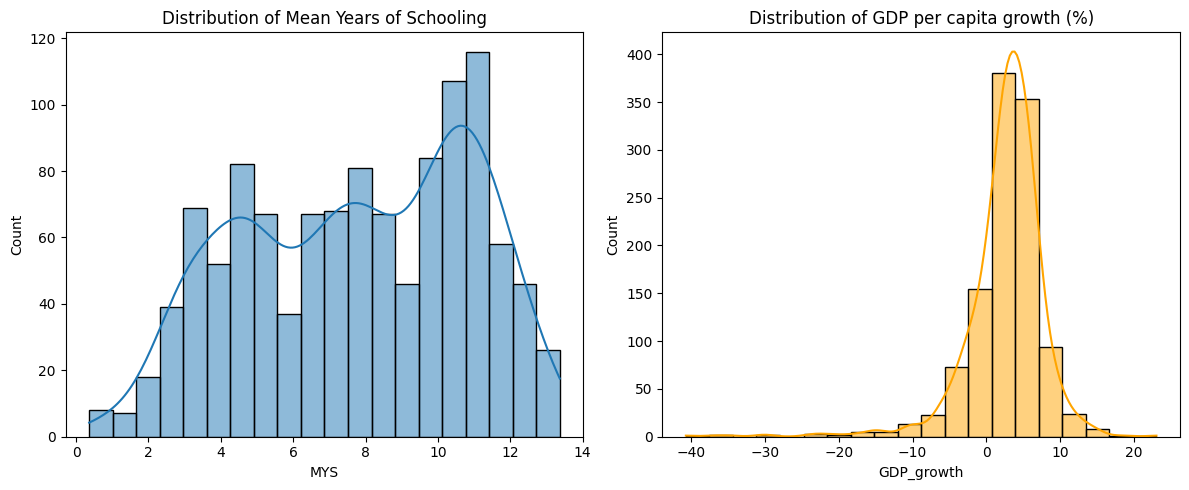

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["MYS"], bins=20, kde=True)
plt.title("Distribution of Mean Years of Schooling")

plt.subplot(1,2,2)
sns.histplot(df["GDP_growth"], bins=20, kde=True, color='orange')
plt.title("Distribution of GDP per capita growth (%)")

plt.tight_layout()
plt.show()


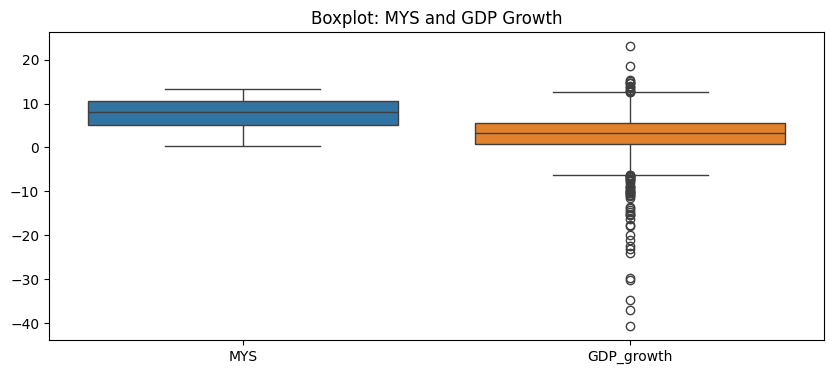

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[["MYS","GDP_growth"]])
plt.title("Boxplot: MYS and GDP Growth")
plt.show()


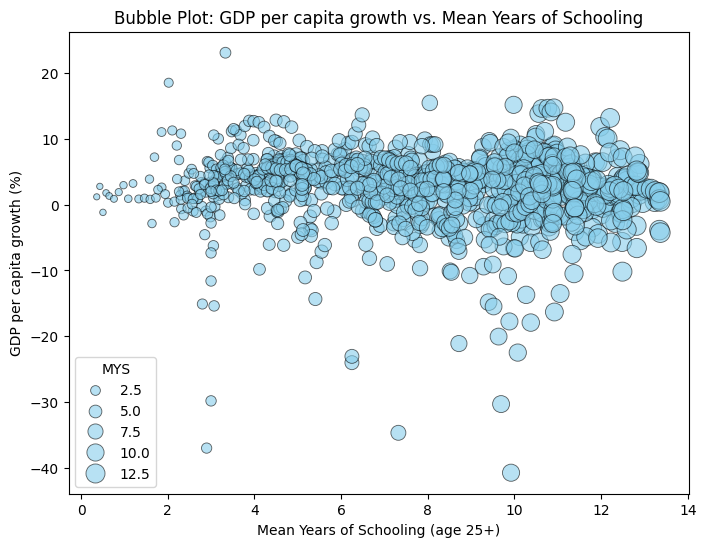

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="MYS", y="GDP_growth", size="MYS", alpha=0.6, sizes=(20, 200), color='skyblue', edgecolor='black')
plt.title("Bubble Plot: GDP per capita growth vs. Mean Years of Schooling")
plt.xlabel("Mean Years of Schooling (age 25+)")
plt.ylabel("GDP per capita growth (%)")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("/content/MYSlevel_GDPpcgrowth_AsiaNoResource.csv")

# Drop missing
df = df.dropna(subset=["MYS","GDP_growth"])

# Interactive bubble plot
fig = px.scatter(
    df,
    x="MYS",
    y="GDP_growth",
    size="MYS",  # bubble size = education level
    color="MYS",
    hover_name="Country",
    hover_data={
        "ISO3": True,
        "Year": True,
        "MYS": ":.2f",
        "GDP_growth": ":.2f"
    },
    title="Interactive Bubble Plot: GDP per capita growth vs Mean Years of Schooling (1990–2020)",
    size_max=40,
)

# Customize style
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(
    xaxis_title="Mean Years of Schooling (age 25+)",
    yaxis_title="GDP per capita growth (%)",
    template="plotly_white"
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("/content/MYSlevel_GDPpcgrowth_AsiaNoResource.csv")

# Drop missing values
df = df.dropna(subset=["MYS", "GDP_growth"])

# Animated Bubble Plot
fig = px.scatter(
    df,
    x="MYS",
    y="GDP_growth",
    size="MYS",
    color="MYS",
    hover_name="Country",
    hover_data={
        "ISO3": True,
        "Year": True,
        "MYS": ":.2f",
        "GDP_growth": ":.2f",
    },
    animation_frame="Year",
    animation_group="Country",
    title="Animated Bubble Plot: GDP per capita growth vs Mean Years of Schooling (1990–2020)",
    size_max=40,
    range_x=[0, 15],
    range_y=[-50, 50],
)


fig.update_traces(marker=dict(line=dict(width=1, color="black")))
fig.update_layout(
    xaxis_title="Mean Years of Schooling (age 25+)",
    yaxis_title="GDP per capita growth (%)",
    template="plotly_white",
    title_x=0.5
)

fig.show()


In [ ]:
fig2 = px.box(
    df,
    x="Year",
    y="GDP_growth",
    points="all",
    hover_data=["Country", "MYS"],
    color="Year",
    title="Interactive Box Plot: GDP per capita growth by Year (1990–2020)",
)

fig2.update_layout(
    yaxis_title="GDP per capita growth (%)",
    xaxis_title="Year",
    template="plotly_white",
    showlegend=False,
)

fig2.show()


In [ ]:
fig.write_html("/content/MYS_AnimatedBubble.html")